In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
print('GPU available: {}'.format(torch.cuda.is_available()))

GPU available: True


In [2]:
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'

In [3]:
#Transformers are needed to cast the image data into the required format for input into our model
#step1= It is composed using transforms.Compose function
#step2= transforms.ToTensor() is used to convert the composed images to Pytorch tensors
#step3= transforms.Normalize() is used to normalize our pixel values  image=(image-mean)/std
#       we pass the input as (0.5, ),(0.5, ) to normalize our image data between -1 and 1
#step4= for RGB images we use transformed values instead ((0.5,0.5,0.5),(0.5,0.5,0.5))
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, ),(0.5, ))])

In [4]:
trainset=torchvision.datasets.MNIST('mnist',train=True,download=True,transform=transform)
testset=torchvision.datasets.MNIST('mnist',train=False,download=True,transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4318571.80it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 63855.95it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 241321.68it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5255318.28it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [5]:
##60000 training examples and 10000 test examples
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [6]:
##first value in our dataset
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

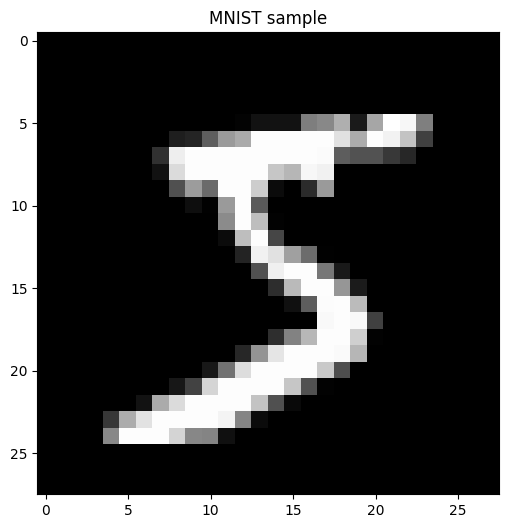

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def imgshow(title='',image=None,size=6):
  w=image.shape[0]
  h=image.shape[1]
  aspect_ratio=w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()
## converting image to numpy array
image=trainset.data[0].numpy()
imgshow('MNIST sample',image)

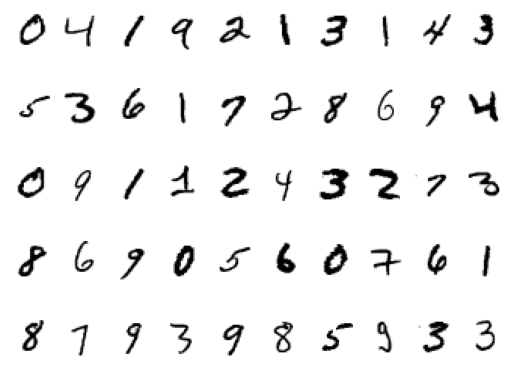

In [8]:
import matplotlib.pyplot as plt
figure=plt.figure()
num_of_images=50
for index in range(1,num_of_images+1):
  plt.subplot(5,10,index)
  plt.axis('off')
  plt.imshow(trainset.data[index],cmap='gray_r')

In [9]:
##Data Loader- Function we use to grab the data in the specified batch size during training. We cant feed all the data once that is why we feed it
##             into the batch sizes
##             Train and test sets are seprated by equating shuffle=True
##             num_workers- specifies how many cpu cores we wish to utilize
trainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True,num_workers=0)
testloader=torch.utils.data.DataLoader(testset,batch_size=128,shuffle=False,num_workers=0)

In [10]:
dataiter=iter(trainloader)   #iter returns an iterator for our train_loader object
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [11]:
images[0].shape

torch.Size([1, 28, 28])

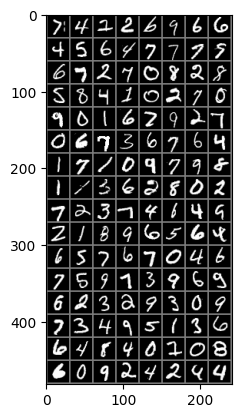

74226966456477796727082858410270901629270673676417109798113628027237464921896564657670467597396962329309734951366484070860924244


In [12]:
import numpy as np
import matplotlib.pyplot as plt
def imshow(img):
  img=img/2 +0.5   ##unnormalization
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter=iter(trainloader)   #iter returns an iterator for our train_loader object
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))                    ##printing images
print(''.join('%1s' % labels[j].numpy() for j in range(128)))  ##printing labels

In [13]:
##Building the Model
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()   ##subclass of nn.Module and inherits all its properties
    self.conv1=nn.Conv2d(1,32,3)  ## stride=1, 32 filters, 3x3 kernel size, padding=0
    self.conv2=nn.Conv2d(32,64,3) ## stride=1, 64 filters, 3x3 kernel size, padding=0
    self.pool=nn.MaxPool2d(2,2)   ## stride=2, 2x2 kernel size
    self.fc1=nn.Linear(64*12*12,128) ##takes output of max pool which is 64*12*12 and connects it to 128 nodes layer
    self.fc2=nn.Linear(128,10)     ## takes output from fc1 which is 128 nodes and connects it to10 output nodes
  def forward(self,x):
    #forward propagation seq--> Conv1 Relu Conv2 Relu Maxpool Flatten fc1 fc2
    x=F.relu(self.conv1(x))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1, 64*12*12)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return x

net=Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [15]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001, momentum=0.9)

In [16]:
epochs=20
epoch_log=[]  ##creating empty arrays to store logs
loss_log=[]
accuracy_log=[]
for epoch in range(epochs):
  print(f'Starting Epoch: {epoch+1}')
  running_loss=0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels=data ##iterating through our trainloader iterator
    inputs=inputs.to(device)  ##moving data to gpu
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss=running_loss+loss.item()
    if i%50==49:
      correct=0  ##This variable holds the count for all the correct predictions
      total=0    ##This variable holds the count for the number of labels iterated
      with torch.no_grad():
        for data in testloader:  ##iterating through the testloader iterator
          images,labels=data
          images=images.to(device)  ##moving data to gpu
          labels=labels.to(device)
          outputs=net(images)   ##forward propagating our test data batch through our model
          _,predicted=torch.max(outputs.data,dim=1) ##getting predictions from the maximum value of the predicted output tensor
          total=total+ labels.size(0)  ##keep adding label.size to the total variable
          correct=correct+ (predicted==labels).sum().item() ##keep a running total of the number of predicted predicted labeled correctly
        accuracy=100* correct/total
        epoch_num=epoch+1
        actual_loss=running_loss/50
        print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
        running_loss = 0.0
  epoch_log.append(epoch_num)  ##storing training statistics after each epoch
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

Starting Epoch: 1
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.271, Test Accuracy = 55.630%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.112, Test Accuracy = 65.640%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.627, Test Accuracy = 78.440%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.864, Test Accuracy = 84.500%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.557, Test Accuracy = 87.310%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.437, Test Accuracy = 88.390%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.416, Test Accuracy = 89.070%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.375, Test Accuracy = 89.760%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.377, Test Accuracy = 90.020%
Starting Epoch: 2
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.344, Test Accuracy = 91.060%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.312, Test Accuracy = 91.370%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.309, Test Accuracy = 91.300%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.295, Te

In [17]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

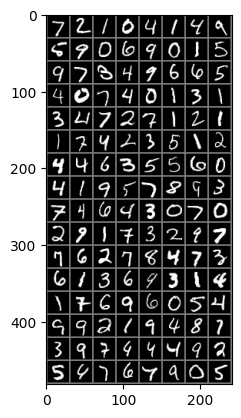

GroundTruth:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [18]:
dataiter=iter(testloader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' % labels[j].numpy() for j in range(128)))

In [19]:
##Reloading the model which we saved
net=Net()
net.to(device)
net.load_state_dict(torch.load(PATH)) ##loading weights from this path

<All keys matched successfully>

In [21]:
test_iter=iter(testloader)
images,labels=next(test_iter)
images=images.to(device)
labels=labels.to(device)
outputs=net(images)
_,predicted=torch.max(outputs,1)
# Print our 128 predictions
print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873979449254767905


In [22]:
##Showing our accuracy again
correct=0
total=0
with torch.no_grad():
  for data in testloader:
    images,labels=data
    images=images.to(device)
    labels=labels.to(device)
    outputs=net(images)
    _,predicted=torch.max(outputs.data,1)
    total=total+labels.size(0)
    correct=correct+(predicted==labels).sum().item()

accuracy=100*correct/total
print('Accuracy on 10000 test images is:',accuracy)


Accuracy on 10000 test images is: 98.67


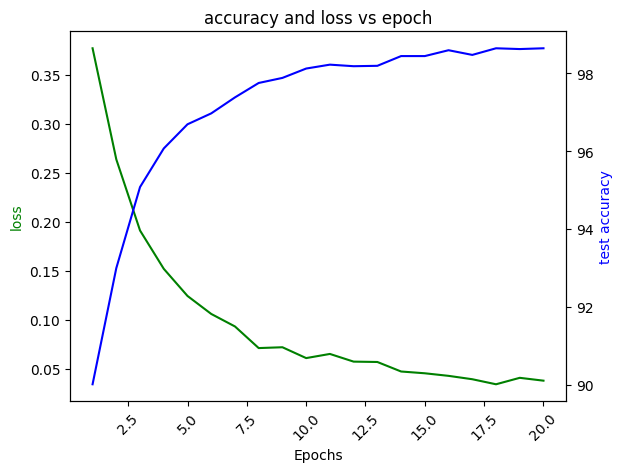

In [23]:
fig,ax1=plt.subplots()
plt.title('accuracy and loss vs epoch')
plt.xticks(rotation=45)
ax2=ax1.twinx()
ax1.plot(epoch_log,loss_log,'g-')
ax2.plot(epoch_log,accuracy_log,'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss',color='g')
ax2.set_ylabel('test accuracy',color='b')
plt.show()

In [24]:
epoch_log=list(range(1,11))
epoch_log

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(15):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    class_accuracy = 100 * class_correct[i] / class_total[i]
    print(f'Accuracy of {i} : {class_accuracy:.3f}%')

Accuracy of 0 : 99.130%
Accuracy of 1 : 99.248%
Accuracy of 2 : 98.438%
Accuracy of 3 : 98.333%
Accuracy of 4 : 97.638%
Accuracy of 5 : 99.074%
Accuracy of 6 : 99.074%
Accuracy of 7 : 99.187%
Accuracy of 8 : 100.000%
Accuracy of 9 : 98.374%


Actual Label: 9, Predicted Label: 4


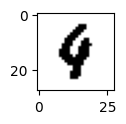

Actual Label: 0, Predicted Label: 6


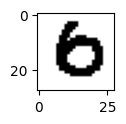

Actual Label: 7, Predicted Label: 2


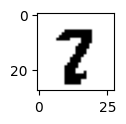

Actual Label: 3, Predicted Label: 5


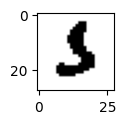

Actual Label: 0, Predicted Label: 6


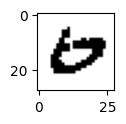

Actual Label: 5, Predicted Label: 3


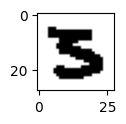

Actual Label: 2, Predicted Label: 8


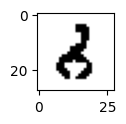

Actual Label: 7, Predicted Label: 2


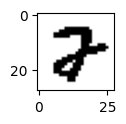

Actual Label: 8, Predicted Label: 1


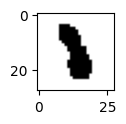

Actual Label: 1, Predicted Label: 2


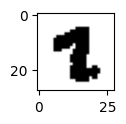

Actual Label: 3, Predicted Label: 7


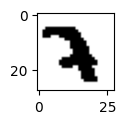

Actual Label: 8, Predicted Label: 5


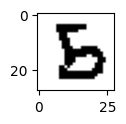

Actual Label: 9, Predicted Label: 7


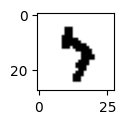

Actual Label: 9, Predicted Label: 4


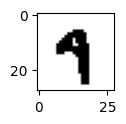

Actual Label: 8, Predicted Label: 9


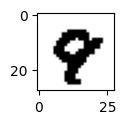

Actual Label: 7, Predicted Label: 8


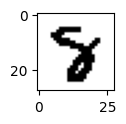

Actual Label: 9, Predicted Label: 7


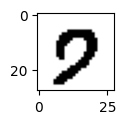

Actual Label: 7, Predicted Label: 9


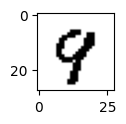

Actual Label: 5, Predicted Label: 3


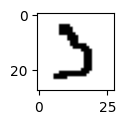

Actual Label: 9, Predicted Label: 8


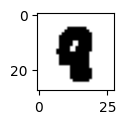

Actual Label: 0, Predicted Label: 6


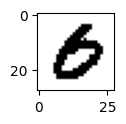

Actual Label: 5, Predicted Label: 6


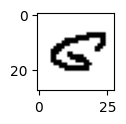

Actual Label: 2, Predicted Label: 7


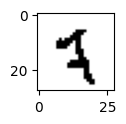

Actual Label: 1, Predicted Label: 6


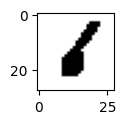

Actual Label: 5, Predicted Label: 6


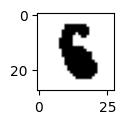

Actual Label: 2, Predicted Label: 7


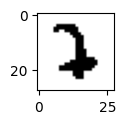

Actual Label: 4, Predicted Label: 9


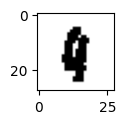

Actual Label: 9, Predicted Label: 4


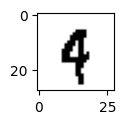

Actual Label: 5, Predicted Label: 9


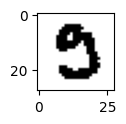

Actual Label: 1, Predicted Label: 7


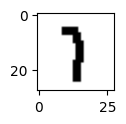

Actual Label: 0, Predicted Label: 8


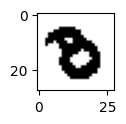

Actual Label: 2, Predicted Label: 7


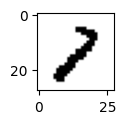

Actual Label: 1, Predicted Label: 7


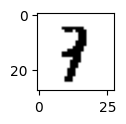

Actual Label: 9, Predicted Label: 7


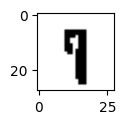

Actual Label: 3, Predicted Label: 1


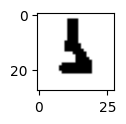

Actual Label: 7, Predicted Label: 8


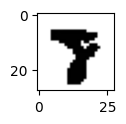

Actual Label: 3, Predicted Label: 9


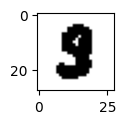

Actual Label: 3, Predicted Label: 2


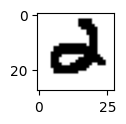

Actual Label: 0, Predicted Label: 2


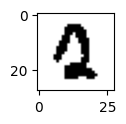

Actual Label: 5, Predicted Label: 9


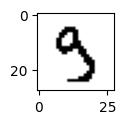

Actual Label: 0, Predicted Label: 8


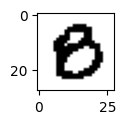

Actual Label: 8, Predicted Label: 2


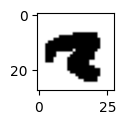

Actual Label: 4, Predicted Label: 9


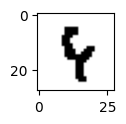

Actual Label: 0, Predicted Label: 2


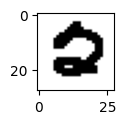

Actual Label: 3, Predicted Label: 5


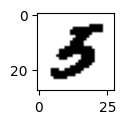

Actual Label: 9, Predicted Label: 4


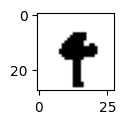

Actual Label: 1, Predicted Label: 8


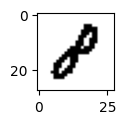

Actual Label: 0, Predicted Label: 2


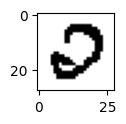

Actual Label: 0, Predicted Label: 6


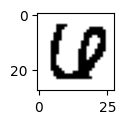

Actual Label: 9, Predicted Label: 4


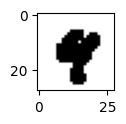

Actual Label: 1, Predicted Label: 6


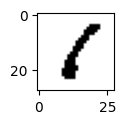

Actual Label: 0, Predicted Label: 8


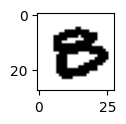

Actual Label: 0, Predicted Label: 9


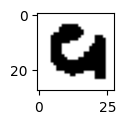

Actual Label: 8, Predicted Label: 5


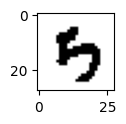

Actual Label: 1, Predicted Label: 9


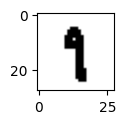

Actual Label: 1, Predicted Label: 9


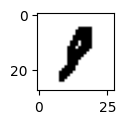

Actual Label: 4, Predicted Label: 9


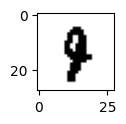

Actual Label: 9, Predicted Label: 4


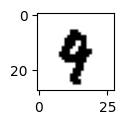

Actual Label: 8, Predicted Label: 6


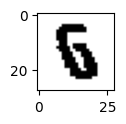

Actual Label: 0, Predicted Label: 2


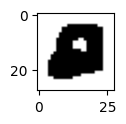

Actual Label: 4, Predicted Label: 2


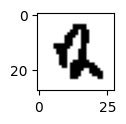

Actual Label: 1, Predicted Label: 6


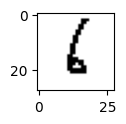

Actual Label: 8, Predicted Label: 7


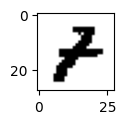

Actual Label: 1, Predicted Label: 6


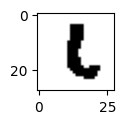

Actual Label: 4, Predicted Label: 9


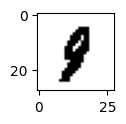

Actual Label: 0, Predicted Label: 8


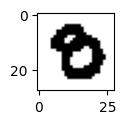

Actual Label: 2, Predicted Label: 3


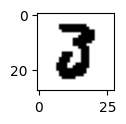

Actual Label: 7, Predicted Label: 9


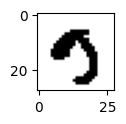

Actual Label: 5, Predicted Label: 3


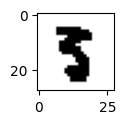

Actual Label: 8, Predicted Label: 6


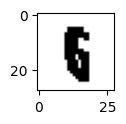

Actual Label: 0, Predicted Label: 6


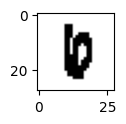

Actual Label: 7, Predicted Label: 9


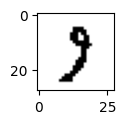

Actual Label: 2, Predicted Label: 1


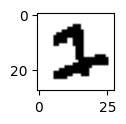

Actual Label: 0, Predicted Label: 6


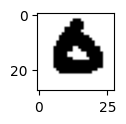

Actual Label: 1, Predicted Label: 9


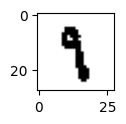

Actual Label: 4, Predicted Label: 6


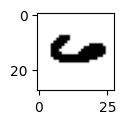

Actual Label: 5, Predicted Label: 6


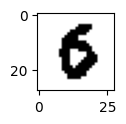

Actual Label: 0, Predicted Label: 5


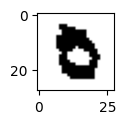

Actual Label: 0, Predicted Label: 8


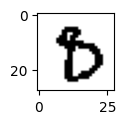

Actual Label: 3, Predicted Label: 9


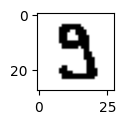

Actual Label: 9, Predicted Label: 4


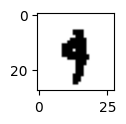

Actual Label: 9, Predicted Label: 8


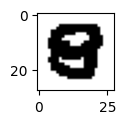

Actual Label: 2, Predicted Label: 7


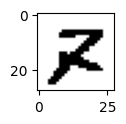

Actual Label: 3, Predicted Label: 1


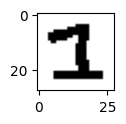

Actual Label: 1, Predicted Label: 7


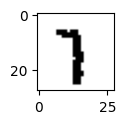

Actual Label: 0, Predicted Label: 8


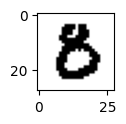

Actual Label: 3, Predicted Label: 9


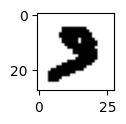

Actual Label: 7, Predicted Label: 2


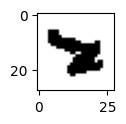

Actual Label: 0, Predicted Label: 2


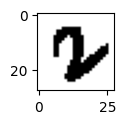

Actual Label: 7, Predicted Label: 9


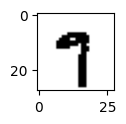

Actual Label: 8, Predicted Label: 2


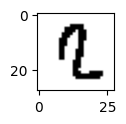

Actual Label: 2, Predicted Label: 3


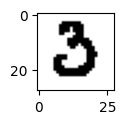

Actual Label: 8, Predicted Label: 2


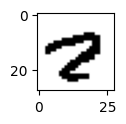

Actual Label: 7, Predicted Label: 8


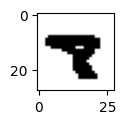

Actual Label: 5, Predicted Label: 6


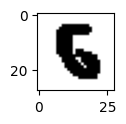

Actual Label: 9, Predicted Label: 8


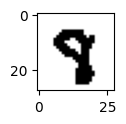

Actual Label: 5, Predicted Label: 3


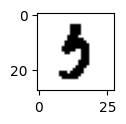

Actual Label: 8, Predicted Label: 9


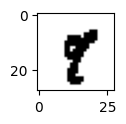

Actual Label: 0, Predicted Label: 8


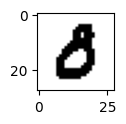

Actual Label: 0, Predicted Label: 6


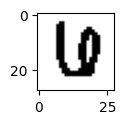

Actual Label: 9, Predicted Label: 4


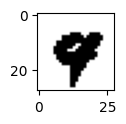

Actual Label: 6, Predicted Label: 1


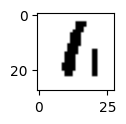

Actual Label: 5, Predicted Label: 3


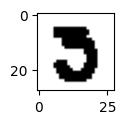

Actual Label: 3, Predicted Label: 2


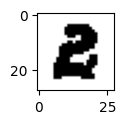

Actual Label: 0, Predicted Label: 7


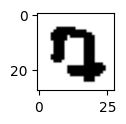

Actual Label: 8, Predicted Label: 3


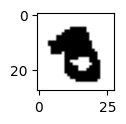

Actual Label: 5, Predicted Label: 9


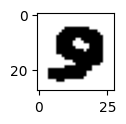

Actual Label: 3, Predicted Label: 9


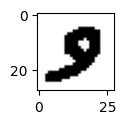

Actual Label: 5, Predicted Label: 0


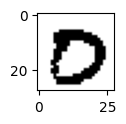

Actual Label: 7, Predicted Label: 9


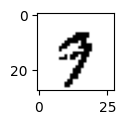

Actual Label: 1, Predicted Label: 7


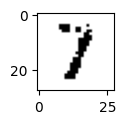

Actual Label: 7, Predicted Label: 0


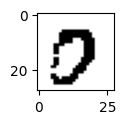

Actual Label: 8, Predicted Label: 0


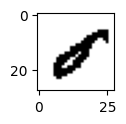

Actual Label: 6, Predicted Label: 1


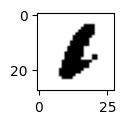

Actual Label: 8, Predicted Label: 4


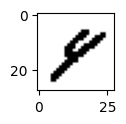

Actual Label: 8, Predicted Label: 2


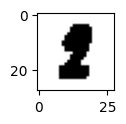

Actual Label: 9, Predicted Label: 3


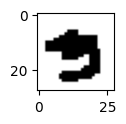

Actual Label: 5, Predicted Label: 3


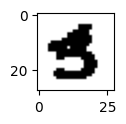

Actual Label: 5, Predicted Label: 8


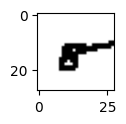

Actual Label: 9, Predicted Label: 4


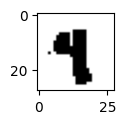

Actual Label: 9, Predicted Label: 4


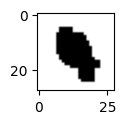

Actual Label: 2, Predicted Label: 7


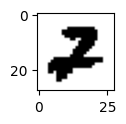

Actual Label: 2, Predicted Label: 7


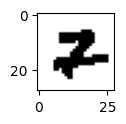

Actual Label: 2, Predicted Label: 7


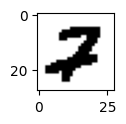

Actual Label: 7, Predicted Label: 2


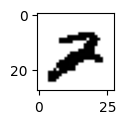

Actual Label: 3, Predicted Label: 6


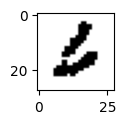

Actual Label: 7, Predicted Label: 9


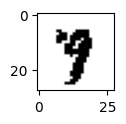

Actual Label: 5, Predicted Label: 6


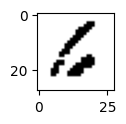

Actual Label: 6, Predicted Label: 5


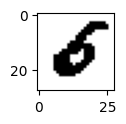

Actual Label: 9, Predicted Label: 2


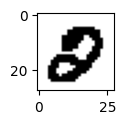

Actual Label: 0, Predicted Label: 5


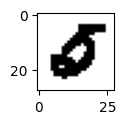

Actual Label: 7, Predicted Label: 2


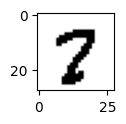

Actual Label: 8, Predicted Label: 2


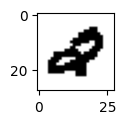

In [26]:
net.eval()

# We don't need gradients for validation, so wrap in
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.argmax() to get the predictions, argmax is used for long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # For test data in each batch we identify when predictions did not match the label
        # then we print out the actual ground truth
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {pred}, Predicted Label: {label}')
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

In [28]:
from sklearn.metrics import confusion_matrix
# Initialize blank tensors to store our predictions and labels lists(tensors)
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')
with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 977    0    0    0    0    1    0    1    1    0]
 [   0 1129    1    2    0    0    2    0    1    0]
 [   5    1 1012    2    1    0    0    5    5    1]
 [   0    0    2 1000    0    6    0    0    1    1]
 [   0    0    0    0  971    0    0    0    1   10]
 [   2    0    0    2    0  885    1    0    2    0]
 [   7    4    0    1    1    5  938    0    2    0]
 [   1    4    7    1    0    0    0 1011    1    3]
 [   7    1    1    0    0    1    0    3  958    3]
 [   1    3    0    4    4    3    0    6    2  986]]
